In [1]:
#Basic GAN implementation
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

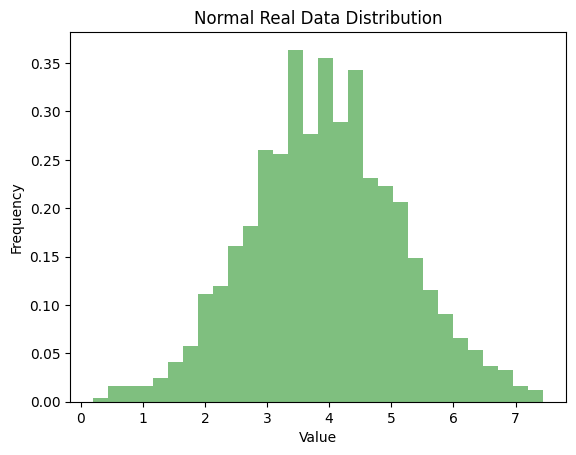

In [2]:
#Generate Sample Data
np.random.seed(0)
data_mean,data_stddev=4,1.25
data=np.random.normal(data_mean,data_stddev,1000).reshape(-1,1)

#Plot Histogram of the generated Data
plt.hist(data,bins=30,density=True,alpha=0.5,color='g')
plt.title('Normal Real Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [3]:
#Define Generator model
generator=Sequential([Dense(128,activation='relu',input_shape=(1,)),
                          Dense(1,activation='linear')],name='generator')

In [4]:
#Define Discriminator model
discriminator=Sequential([Dense(128,activation='relu',input_shape=(1,)),
                          Dense(1,activation='sigmoid')],name='discriminator')

In [5]:
#Compile Discriminator
discriminator.compile(optimizer='adam',loss='binary_crossentropy')

In [6]:
#Combine generator and discriminator to form a GAN model
discriminator.trainable=False #Ensuring only generator gets trained
gan=Sequential([generator,discriminator])

In [7]:
#Compile GAN
gan.compile(optimizer='adam',loss='binary_crossentropy')

In [8]:
#Training loop
def train_gan(data,epochs=5000,batch_size=128):
  for epoch in range(epochs):
    noise=np.random.normal(0,1,size=(batch_size,1)) #Generate random noise as input for the generator
    fake_data=generator.predict(noise)#GEnerate Fake Data using generator
    real_data=data[np.random.randint(0,data.shape[0],size=batch_size)]#Sample real data points
    X=np.concatenate([real_data,fake_data])#Combining real and fake data for training the discriminator
    y=np.ones((2*batch_size,1))
    y[batch_size:]=0#Label Real data as 1 and fake data as 0 for training the discriminator
    discriminator_loss=discriminator.train_on_batch(X,y)#Training the discriminator
    noise=np.random.normal(0,1,size=(batch_size,1)) #Generate new random noise for training the generator
    y=np.ones((batch_size,1))#Label fake data as real(1) to fool the discriminator
    gan_loss=gan.train_on_batch(noise,y)#Train the generator(via Gan Model)
    if epochs%500==0:
      print(f"Epoch:{epoch},Discriminator Loss:{discriminator_loss},Generator Loss:{gan_loss}")

#Train GAN
train_gan(data)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 3ms/step
Epoch:2500,Discriminator Loss:0.693587064743042,Generator Loss:0.6680895090103149
4/4 [==============================] - 0s 3ms/step
Epoch:2501,Discriminator Loss:0.6935234069824219,Generator Loss:0.679338276386261
4/4 [==============================] - 0s 3ms/step
Epoch:2502,Discriminator Loss:0.693200945854187,Generator Loss:0.6913822889328003
4/4 [==============================] - 0s 3ms/step
Epoch:2503,Discriminator Loss:0.693588376045227,Generator Loss:0.6996067762374878
4/4 [==============================] - 0s 3ms/step
Epoch:2504,Discriminator Loss:0.6931906938552856,Generator Loss:0.7084372043609619
4/4 [==============================] - 0s 3ms/step
Epoch:2505,Discriminator Loss:0.6912145614624023,Generator Loss:0.7133464217185974
4/4 [==============================] - 0s 4ms/step
Epoch:2506,Discriminator Loss:0.6939842700958252,Generator Loss:0.7208200097084045
4/4 [==========

32/32 [==============================] - 0s 1ms/step


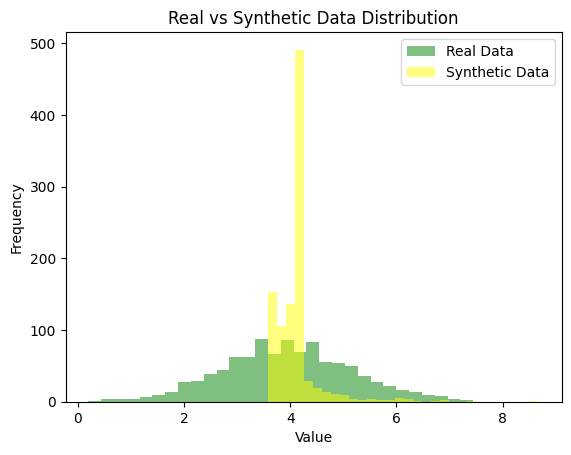

In [9]:
#Generate synthetic data using trained generator
synthetic_data=generator.predict(np.random.normal(0,1,size=(1000,1)))

#Plot real and synthetic data distributions
plt.hist(data,bins=30,alpha=0.5,color='g',label='Real Data')
plt.hist(synthetic_data,bins=30,alpha=0.5,color='yellow',label='Synthetic Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Real vs Synthetic Data Distribution')
plt.show()

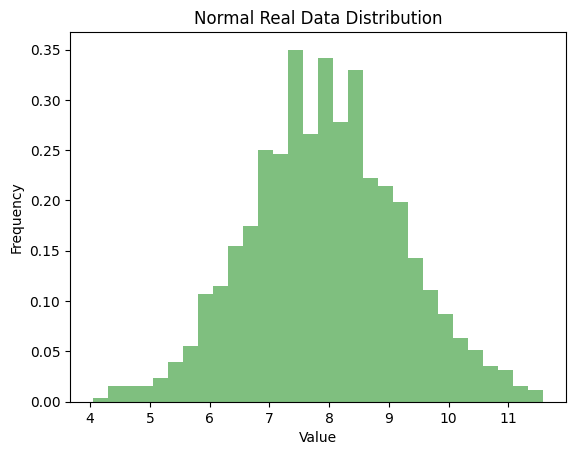

In [10]:
#Assignment GAN
#Generate Sample Data
np.random.seed(0)
data_mean,data_stddev=8,1.3
data=np.random.normal(data_mean,data_stddev,1000).reshape(-1,1)

#Plot Histogram of the generated Data
plt.hist(data,bins=30,density=True,alpha=0.5,color='g')
plt.title('Normal Real Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [11]:
#Define Generator model
generator=Sequential([Dense(128,activation='relu',input_shape=(1,)),
                          Dense(1,activation='linear')],name='generator')
#Define Discriminator model
discriminator=Sequential([Dense(128,activation='relu',input_shape=(1,)),
                          Dense(1,activation='sigmoid')],name='discriminator')
#Compile Discriminator
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
#Combine generator and discriminator to form a GAN model
discriminator.trainable=False #Ensuring only generator gets trained
gan=Sequential([generator,discriminator])
#Compile GAN
gan.compile(optimizer='adam',loss='binary_crossentropy')


In [12]:
#Training loop
def train_gan(data,epochs=5000,batch_size=128):
  for epoch in range(epochs):
    noise=np.random.normal(0,1,size=(batch_size,1)) #Generate random noise as input for the generator
    fake_data=generator.predict(noise)#GEnerate Fake Data using generator
    real_data=data[np.random.randint(0,data.shape[0],size=batch_size)]#Sample real data points
    X=np.concatenate([real_data,fake_data])#Combining real and fake data for training the discriminator
    y=np.ones((2*batch_size,1))
    y[batch_size:]=0#Label Real data as 1 and fake data as 0 for training the discriminator
    discriminator_loss=discriminator.train_on_batch(X,y)#Training the discriminator
    noise=np.random.normal(0,1,size=(batch_size,1)) #Generate new random noise for training the generator
    y=np.ones((batch_size,1))#Label fake data as real(1) to fool the discriminator
    gan_loss=gan.train_on_batch(noise,y)#Train the generator(via Gan Model)
    if epochs%500==0:
      print(f"Epoch:{epoch},Discriminator Loss:{discriminator_loss},Generator Loss:{gan_loss}")

#Train GAN
train_gan(data)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 3ms/step
Epoch:2500,Discriminator Loss:0.693327784538269,Generator Loss:0.6651443243026733
4/4 [==============================] - 0s 3ms/step
Epoch:2501,Discriminator Loss:0.6936010122299194,Generator Loss:0.666303813457489
4/4 [==============================] - 0s 3ms/step
Epoch:2502,Discriminator Loss:0.6934179067611694,Generator Loss:0.6715103387832642
4/4 [==============================] - 0s 3ms/step
Epoch:2503,Discriminator Loss:0.6931266784667969,Generator Loss:0.6759859323501587
4/4 [==============================] - 0s 3ms/step
Epoch:2504,Discriminator Loss:0.6930828094482422,Generator Loss:0.676673948764801
4/4 [==============================] - 0s 3ms/step
Epoch:2505,Discriminator Loss:0.6931977868080139,Generator Loss:0.6788097023963928
4/4 [==============================] - 0s 4ms/step
Epoch:2506,Discriminator Loss:0.6930365562438965,Generator Loss:0.6771827936172485
4/4 [=========

32/32 [==============================] - 0s 2ms/step


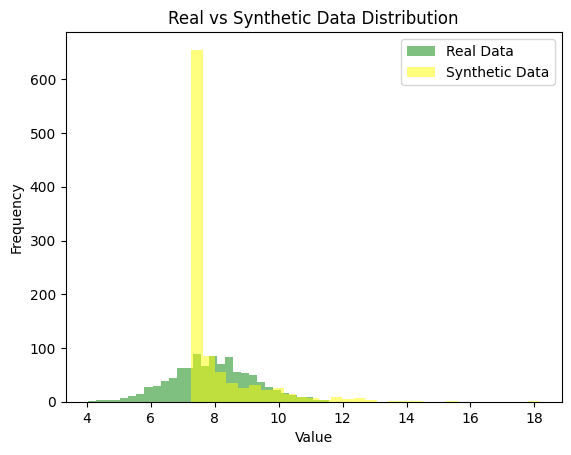

In [13]:
#Generate synthetic data using trained generator
synthetic_data=generator.predict(np.random.normal(0,1,size=(1000,1)))

#Plot real and synthetic data distributions
plt.hist(data,bins=30,alpha=0.5,color='g',label='Real Data')
plt.hist(synthetic_data,bins=30,alpha=0.5,color='yellow',label='Synthetic Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Real vs Synthetic Data Distribution')
plt.show()